# Support Vector Machine (SVM)

Metode ini memiliki beberapa keunggulan, antara lain:
1. Efektif utk kasus dgn dimensi tinggi
2. Mampu mengklasifikasi kasus dgn dimensi yang lebih besar dari sampel
3. Karena menggunakan subset data pelatihan (dikenal dgn istilah suppor vector) maka svm sangat hemat memori.
4. Serba guna dgn berbagi variasi fungi kernel yg bisa digunakan.

SVM juga memiliki banyak kendala. kendala pertama adalah overfitting.

## Menyiapkan Dataset

In [1]:
# import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Mengambil data dari file csv
datasiswa = pd.read_csv('beasiswa.csv')
df = pd.DataFrame(datasiswa,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)', 'Beasiswa/Tidak'])
X = np.asarray(datasiswa)
X_train = X[:,1:3]
y_train = X[:,3:4]

# Mengambil data validasi
datavalidasi = pd.read_csv('validasibeasiswa.csv')
df2 = pd.DataFrame(datavalidasi,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)', 'Beasiswa/Tidak'])
X2 = np.asarray(datavalidasi)
X_val = X2[:,1:3]
y_val = X2[:,3:5]

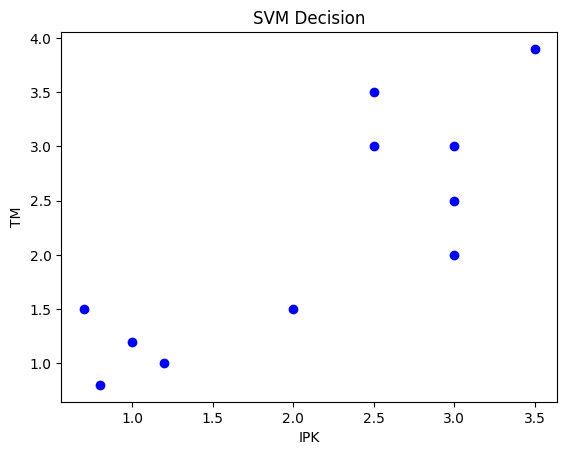

In [3]:
plt.scatter([point[0] for point in X_train],[point[1] for point in X_train],color="blue")
plt.xlabel('IPK')
plt.ylabel('TM')
plt.title('SVM Decision')
plt.show()

## Memanggil SVM

In [4]:
# Memanggil SVM
clf = svm.SVC(kernel='linear')

#  Fit model dgn data latih dan target/label
clf.fit(X_train,y_train)

c:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Menguji model SVM yang sudah dibentuk dari data latih "beasiswa.csv"

In [5]:
# Prediksi
y_pred = clf.predict(X_val)
print((y_val).T)
print(y_pred)
print(classification_report(y_val,y_pred))

[[0. 0. 0. 1. 1. 1. 1.]]
[0. 0. 0. 1. 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



# Visualisasi membuat model

In [6]:
x_min, x_max = X[:, 1].min() - 2, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 2, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

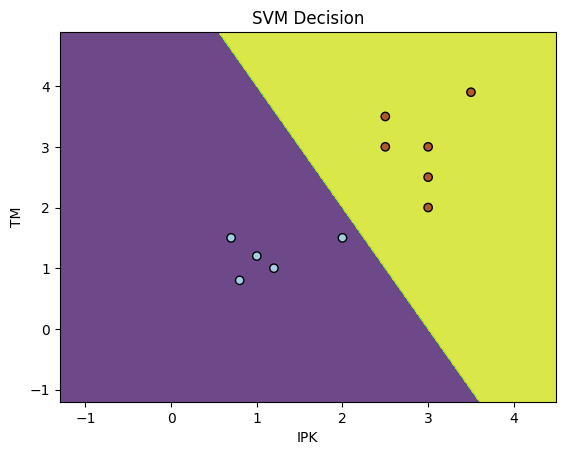

In [7]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 1], X[:, 2], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('IPK')
plt.ylabel('TM')
plt.title('SVM Decision')
plt.show()

## Klasifikasi dgn SVM dgn GUI Destop

In [19]:
datatest = np.array([0.70,1.50])
pred_test = clf.predict(datatest.reshape(1, -1))
print(pred_test)

[0.]


Dalam kode ini, kami menggunakan datatest.reshape(1, -1) untuk mengubah dimensi datatest menjadi bentuk yang sesuai untuk prediksi dengan model SVM.

In [20]:
import tkinter as tk
def prediksi():
    """ prediksi dgn JST
    """
    x = ent_ipk.get()
    X = np.array(float(x)).reshape(-1,1)
    y = ent_tm.get()
    Y = np.array(float(y)).reshape(-1,1)
    data2 = np.concatenate([X,Y],axis=1)
    jurusan = clf.predict(data2)
    jurusan = float(jurusan)
    if(jurusan < 0.5):
        hasil_jurusan["text"] = "Tidak Mendapatkan Beasiswa"
    else:
        hasil_jurusan["text"] = "Mendapatkan Beasiswa"

In [21]:
## Set Window
window = tk.Tk()
window.title("Penentuan Beasiswa")
window.resizable(width=True, height=True)

# Membuat widget utk masukan 
frm_entry = tk.Frame(master=window)
ent_ipk = tk.Entry(master=frm_entry, width=10)
lbl_varx = tk.Label(master=frm_entry, text="IPK")
ent_tm = tk.Entry(master=frm_entry, width=10)
lbl_vary = tk.Label(master=frm_entry, text="Indeks Kemiskinan")

# Layout Form masukan dgn .grid() geometry manager
ent_ipk.grid(row=0, column=1, sticky="e")
lbl_varx.grid(row=0,column=0,sticky="w")
lbl_vary.grid(row=1,column=0,sticky="w")
ent_tm.grid(row=1, column=1, sticky="e")

# Membuat tombol dan keluaran
btn_convert = tk.Button(master=window, text="Penentuan Beasiswa", command=prediksi)

# Set-Up layout keluaran dgn .grid() geometry manager
hasil_jurusan = tk.Label(master=frm_entry, width=20)
lbl_jurusan = tk.Label(master=frm_entry, text="Hasil Uji Kelayakan : ")
frm_entry.grid(row=0,column=1,padx=10)
btn_convert.grid(row=1, column=1, pady=10)
hasil_jurusan.grid(row=4,column=1,sticky="w")
lbl_jurusan.grid(row=4, column=0, sticky="w")

# Menjalankan aplikasi
window.mainloop()